In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("Datasheet\Demand_History.csv")

In [109]:
df

demand_point_index  x_coordinate  y_coordinate      2010      2011  \
0                      0           0.5           0.5  0.352242  0.667932   
1                      1           1.5           0.5  0.325940  0.591964   
2                      2           2.5           0.5  0.373752  0.591890   
3                      3           3.5           0.5  0.420686  0.584055   
4                      4           4.5           0.5  0.475621  0.647940   
...                  ...           ...           ...       ...       ...   
4091                4091          59.5          63.5  0.171015  0.334565   
4092                4092          60.5          63.5  0.041716  0.061741   
4093                4093          61.5          63.5  0.100895  0.180352   
4094                4094          62.5          63.5  0.155353  0.290825   
4095                4095          63.5          63.5  0.209372  0.340185   

          2012      2013      2014      2015      2016       2017       2018  
0     0.958593  2.911901  4.338274  6.561995  8.454417  10.595324  13.119572  
1     0.862652  2.589068  4.196034  5.745551  8.753195  11.126995  12.020091  
2     0.969733  2.641432  3.541772  5.469161  8.414627  10.115336  14.018254  
3     0.906547  2.378577  3.888121  5.846089  9.083868  12.424885  15.012302  
4     0.981544  2.665400  4.218711  6.776609  8.851107  11.731131  16.355563  
...        ...       ...       ...       ...       ...        ...        ...  
4091  0.556055  1.373291  1.837586  2.517146  3.352280   4.149888   5.426193  
4092  0.131291  0.386540  0.755846  0.941116  1.107797   1.309479   2.057450  
4093  0.296299  0.705373  1.300220  1.608609  1.822806   2.333681   3.218519  
4094  0.557803  1.516066  2.399426  2.719197  4.494515   6.096858   6.262574  
4095  0.749491  1.904285  2.775772  3.404641  4.574922   6.301078   6.860939  

[4096 rows x 12 columns]

In [110]:
df.isnull().sum()

demand_point_index    0
x_coordinate          0
y_coordinate          0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
dtype: int64

In [111]:
df1 = pd.read_csv("Datasheet\exisiting_EV_infrastructure_2018.csv")

In [112]:
df1


supply_point_index  x_coordinate  y_coordinate  total_parking_slots  \
0                    0     50.163110     19.412014                   23   
1                    1     37.336451     58.119225                   27   
2                    2     46.709232     57.525650                   31   
3                    3     30.528626     55.379835                   26   
4                    4     51.521781     35.116755                   32   
..                 ...           ...           ...                  ...   
95                  95     45.471204     20.999414                   24   
96                  96     30.318396     33.388335                   32   
97                  97     36.218839     22.235766                   32   
98                  98     42.936915     38.122442                   28   
99                  99     19.590263      3.830284                   24   

    existing_num_SCS  existing_num_FCS  
0                  5                 3  
1                  4                 7  
2                  6                14  
3                  5                 5  
4                 11                 6  
..               ...               ...  
95                 3                 4  
96                 5                10  
97                 4                14  
98                 7                 5  
99                 2                11  

[100 rows x 6 columns]

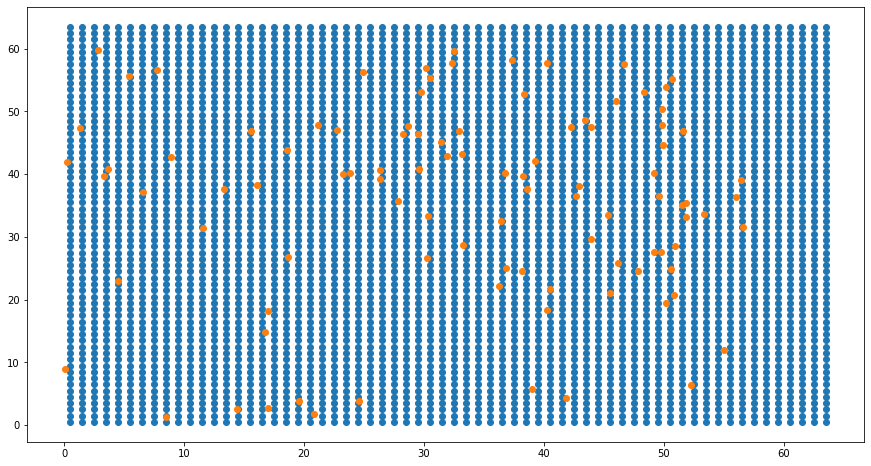

In [113]:
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(df.x_coordinate,df.y_coordinate)
plt.scatter(df1.x_coordinate,df1.y_coordinate)

In [114]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split


In [115]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [116]:
from pandas.core.indexes.interval import date_range
ndf=df.T.iloc[3:,:]
ndf.index=pd.to_datetime(ndf.index)
ndf

0          1          2          3          4          5     \
2010-01-01   0.352242   0.325940   0.373752   0.420686   0.475621   0.380156   
2011-01-01   0.667932   0.591964   0.591890   0.584055   0.647940   0.725189   
2012-01-01   0.958593   0.862652   0.969733   0.906547   0.981544   1.076054   
2013-01-01   2.911901   2.589068   2.641432   2.378577   2.665400   2.762618   
2014-01-01   4.338274   4.196034   3.541772   3.888121   4.218711   4.220747   
2015-01-01   6.561995   5.745551   5.469161   5.846089   6.776609   6.760395   
2016-01-01   8.454417   8.753195   8.414627   9.083868   8.851107   9.331196   
2017-01-01  10.595324  11.126995  10.115336  12.424885  11.731131  14.743943   
2018-01-01  13.119572  12.020091  14.018254  15.012302  16.355563  17.559998   

                 6          7          8          9     ...      4086  \
2010-01-01   0.449348   0.470071   0.537307   0.445734  ...  0.114351   
2011-01-01   0.730466   0.866474   0.833661   0.775279  ...  0.185420   
2012-01-01   1.220484   1.615454   1.622691   1.316209  ...  0.489806   
2013-01-01   2.655187   3.273061   3.366533   3.795858  ...  1.285151   
2014-01-01   5.333594   5.442867   5.973267   4.781361  ...  2.168647   
2015-01-01   8.620496   8.681284  10.033183   9.277640  ...  3.320948   
2016-01-01  11.406751  11.135352  13.210567  10.992479  ...  4.336336   
2017-01-01  13.115854  14.708272  17.291626  17.386210  ...  6.095297   
2018-01-01  19.696415  19.367417  21.899847  21.765241  ...  6.625857   

                4087      4088      4089      4090      4091      4092  \
2010-01-01  0.075160  0.081059  0.083821  0.158356  0.171015  0.041716   
2011-01-01  0.131877  0.138802  0.158354  0.376271  0.334565  0.061741   
2012-01-01  0.298811  0.227962  0.393987  0.670141  0.556055  0.131291   
2013-01-01  0.819191  0.604009  0.966916  1.584710  1.373291  0.386540   
2014-01-01  1.086649  1.012104  1.703340  2.272350  1.837586  0.755846   
2015-01-01  1.427004  1.158568  2.083558  3.635703  2.517146  0.941116   
2016-01-01  1.924844  1.350226  2.802044  5.880033  3.352280  1.107797   
2017-01-01  2.054926  1.598313  3.284002  7.672174  4.149888  1.309479   
2018-01-01  3.612612  2.643128  4.127373  7.833432  5.426193  2.057450   

                4093      4094      4095  
2010-01-01  0.100895  0.155353  0.209372  
2011-01-01  0.180352  0.290825  0.340185  
2012-01-01  0.296299  0.557803  0.749491  
2013-01-01  0.705373  1.516066  1.904285  
2014-01-01  1.300220  2.399426  2.775772  
2015-01-01  1.608609  2.719197  3.404641  
2016-01-01  1.822806  4.494515  4.574922  
2017-01-01  2.333681  6.096858  6.301078  
2018-01-01  3.218519  6.262574  6.860939  

[9 rows x 4096 columns]

In [117]:
ndf.index.freq='ys'
ndf.asfreq('ys')

0          1          2          3          4          5     \
2010-01-01   0.352242   0.325940   0.373752   0.420686   0.475621   0.380156   
2011-01-01   0.667932   0.591964   0.591890   0.584055   0.647940   0.725189   
2012-01-01   0.958593   0.862652   0.969733   0.906547   0.981544   1.076054   
2013-01-01   2.911901   2.589068   2.641432   2.378577   2.665400   2.762618   
2014-01-01   4.338274   4.196034   3.541772   3.888121   4.218711   4.220747   
2015-01-01   6.561995   5.745551   5.469161   5.846089   6.776609   6.760395   
2016-01-01   8.454417   8.753195   8.414627   9.083868   8.851107   9.331196   
2017-01-01  10.595324  11.126995  10.115336  12.424885  11.731131  14.743943   
2018-01-01  13.119572  12.020091  14.018254  15.012302  16.355563  17.559998   

                 6          7          8          9     ...      4086  \
2010-01-01   0.449348   0.470071   0.537307   0.445734  ...  0.114351   
2011-01-01   0.730466   0.866474   0.833661   0.775279  ...  0.185420   
2012-01-01   1.220484   1.615454   1.622691   1.316209  ...  0.489806   
2013-01-01   2.655187   3.273061   3.366533   3.795858  ...  1.285151   
2014-01-01   5.333594   5.442867   5.973267   4.781361  ...  2.168647   
2015-01-01   8.620496   8.681284  10.033183   9.277640  ...  3.320948   
2016-01-01  11.406751  11.135352  13.210567  10.992479  ...  4.336336   
2017-01-01  13.115854  14.708272  17.291626  17.386210  ...  6.095297   
2018-01-01  19.696415  19.367417  21.899847  21.765241  ...  6.625857   

                4087      4088      4089      4090      4091      4092  \
2010-01-01  0.075160  0.081059  0.083821  0.158356  0.171015  0.041716   
2011-01-01  0.131877  0.138802  0.158354  0.376271  0.334565  0.061741   
2012-01-01  0.298811  0.227962  0.393987  0.670141  0.556055  0.131291   
2013-01-01  0.819191  0.604009  0.966916  1.584710  1.373291  0.386540   
2014-01-01  1.086649  1.012104  1.703340  2.272350  1.837586  0.755846   
2015-01-01  1.427004  1.158568  2.083558  3.635703  2.517146  0.941116   
2016-01-01  1.924844  1.350226  2.802044  5.880033  3.352280  1.107797   
2017-01-01  2.054926  1.598313  3.284002  7.672174  4.149888  1.309479   
2018-01-01  3.612612  2.643128  4.127373  7.833432  5.426193  2.057450   

                4093      4094      4095  
2010-01-01  0.100895  0.155353  0.209372  
2011-01-01  0.180352  0.290825  0.340185  
2012-01-01  0.296299  0.557803  0.749491  
2013-01-01  0.705373  1.516066  1.904285  
2014-01-01  1.300220  2.399426  2.775772  
2015-01-01  1.608609  2.719197  3.404641  
2016-01-01  1.822806  4.494515  4.574922  
2017-01-01  2.333681  6.096858  6.301078  
2018-01-01  3.218519  6.262574  6.860939  

[9 rows x 4096 columns]

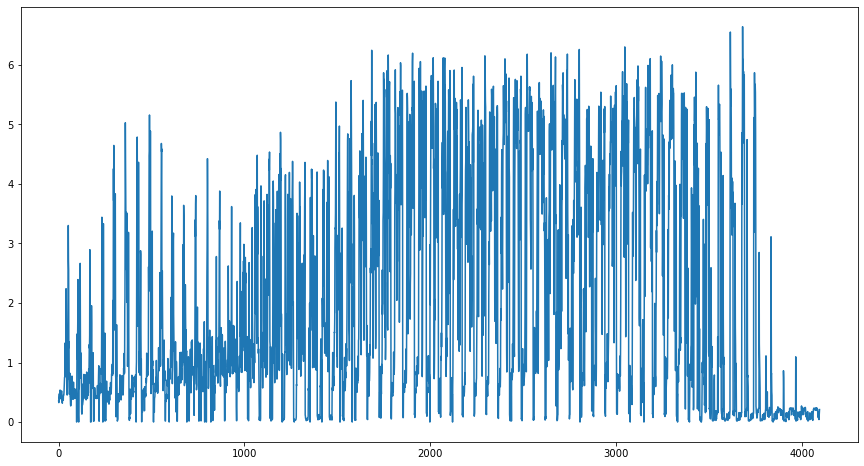

In [118]:

plt.plot(df.index,df['2010'])
    

In [119]:
list=[]
for i in range(0,4096):
  train= ndf.iloc[:9,i]

In [120]:

dfx = pd.DataFrame(columns=('year','demand'))
dfx["demand"]=df["2010"]
dfx["year"] = 2010
dfx

year    demand
0     2010  0.352242
1     2010  0.325940
2     2010  0.373752
3     2010  0.420686
4     2010  0.475621
...    ...       ...
4091  2010  0.171015
4092  2010  0.041716
4093  2010  0.100895
4094  2010  0.155353
4095  2010  0.209372

[4096 rows x 2 columns]

In [130]:
dfx1 = pd.DataFrame(columns=('year','demand'))
dfx1["demand"]=df["2011"]
dfx1["year"] = 2011
dfx1

year    demand
0     2011  0.667932
1     2011  0.591964
2     2011  0.591890
3     2011  0.584055
4     2011  0.647940
...    ...       ...
4091  2011  0.334565
4092  2011  0.061741
4093  2011  0.180352
4094  2011  0.290825
4095  2011  0.340185

[4096 rows x 2 columns]

In [122]:
dfx2 = pd.DataFrame(columns=('year','demand'))
dfx2["demand"]=df["2012"]
dfx2["year"] = 2012

In [123]:
dfx3 = pd.DataFrame(columns=('year','demand'))
dfx3["demand"]=df["2013"]
dfx3["year"] = 2013

In [124]:
dfx4 = pd.DataFrame(columns=('year','demand'))
dfx4["demand"]=df["2014"]
dfx4["year"] = 2014

In [125]:
dfx5 = pd.DataFrame(columns=('year','demand'))
dfx5["demand"]=df["2015"]
dfx5["year"] = 2015

In [126]:
dfx6 = pd.DataFrame(columns=('year','demand'))
dfx6["demand"]=df["2016"]
dfx6["year"] = 2016

In [127]:
dfx7 = pd.DataFrame(columns=('year','demand'))
dfx7["demand"]=df["2017"]
dfx7["year"] = 2017

In [128]:
dfx8 = pd.DataFrame(columns=('year','demand'))
dfx8["demand"]=df["2018"]
dfx8["year"] = 2018

In [132]:
merged = pd.concat([dfx,dfx1,dfx2,dfx3,dfx4,dfx5,dfx6,dfx7,dfx8],axis=0)

In [138]:
merged


year      demand
0     2010    0.352242
1     2010    0.325940
2     2010    0.373752
3     2010    0.420686
4     2010    0.475621
5     2010    0.380156
6     2010    0.449348
7     2010    0.470071
8     2010    0.537307
9     2010    0.445734
10    2010    0.450974
11    2010    0.450948
12    2010    0.488245
13    2010    0.399944
14    2010    0.414848
15    2010    0.487664
16    2010    0.522983
17    2010    0.418989
18    2010    0.375080
19    2010    0.339077
20    2010    0.316241
21    2010    0.395090
22    2010    0.392275
23    2010    0.390262
24    2010    0.417676
25    2010    0.366313
26    2010    0.454910
27    2010    0.455643
28    2010    0.454991
29    2010    0.505456
30    2010    0.589460
31    2010    0.721960
32    2010    0.750844
33    2010    0.747967
34    2010    1.325534
35    2010    0.861826
36    2010    0.841496
37    2010    0.809081
38    2010    0.773966
39    2010    1.155603
40    2010    2.239577
41    2010    2.113546
42    2010    1.516393
43    2010    0.843203
44    2010    0.561732
45    2010    0.479575
46    2010    0.453406
47    2010    0.662992
48    2010    0.726440
49    2010    0.726410
50    2010    1.596877
51    2010    2.243063
52    2010    3.301613
53    2010    2.703967
54    2010    2.555455
55    2010    1.248829
56    2010    1.351159
57    2010    0.600491
58    2010    0.465288
59    2010    0.539187
60    2010    0.821518
61    2010    0.556599
62    2010    0.427235
63    2010    0.412469
64    2010    0.298467
65    2010    0.270704
66    2010    0.285830
67    2010    0.366458
68    2010    0.402829
69    2010    0.402487
70    2010    0.492455
71    2010    0.564658
72    2010    0.771674
73    2010    0.446932
74    2010    0.483482
75    2010    0.438555
76    2010    0.461380
77    2010    0.380905
78    2010    0.398436
79    2010    0.510805
80    2010    0.669455
81    2010    0.544681
82    2010    0.525549
83    2010    0.394256
84    2010    0.422964
85    2010    0.426983
86    2010    0.442476
87    2010    0.556121
88    2010    0.525568
89    2010    0.442776
90    2010    0.398475
91    2010    0.476976
92    2010    0.471733
93    2010    0.515741
94    2010    0.514175
95    2010    0.552190
96    2010    0.468704
97    2010    0.000000
98    2010    0.866173
99    2010    1.356063
100   2010    1.480488
101   2010    1.057677
102   2010    1.338877
103   2010    1.680181
104   2010    2.393156
105   2010    2.203112
106   2010    1.700670
107   2010    0.120933
108   2010    0.000000
109   2010    0.599020
110   2010    0.585313
111   2010    0.563203
112   2010    0.657099
113   2010    0.879542
114   2010    1.103739
115   2010    1.702361
116   2010    2.665390
117   2010    1.446707
118   2010    0.744323
119   2010    1.163551
120   2010    0.997626
121   2010    0.738743
122   2010    0.881937
123   2010    0.728848
124   2010    0.167768
125   2010    0.132678
126   2010    0.145715
127   2010    0.637022
128   2010    0.282591
129   2010    0.311094
130   2010    0.327094
131   2010    0.375237
132   2010    0.388336
133   2010    0.397917
134   2010    0.402863
135   2010    0.577899
136   2010    0.799717
137   2010    0.562809
138   2010    0.472772
139   2010    0.416322
140   2010    0.412881
141   2010    0.428463
142   2010    0.401459
143   2010    0.539052
144   2010    0.792002
145   2010    0.574426
146   2010    0.572163
147   2010    0.494376
148   2010    0.372478
149   2010    0.380131
150   2010    0.543530
151   2010    0.839475
152   2010    0.785108
153   2010    0.562645
154   2010    0.395990
155   2010    0.397023
156   2010    0.496328
157   2010    0.447014
158   2010    0.466625
159   2010    0.550973
160   2010    0.491912
161   2010    0.658160
162   2010    0.892409
163   2010    0.654190
164   2010    0.975000
165   2010    1.300479
166   2010    1.240026
167   2010    1.454997
168   2010    2.895630
169   2010    1.530441
170   2010    1.365815
171   2010    1.177302
172   2010    0.000000
173 

In [137]:
pd.set_option('display.max_rows',36865)

In [140]:
merged.shape

(36864, 2)

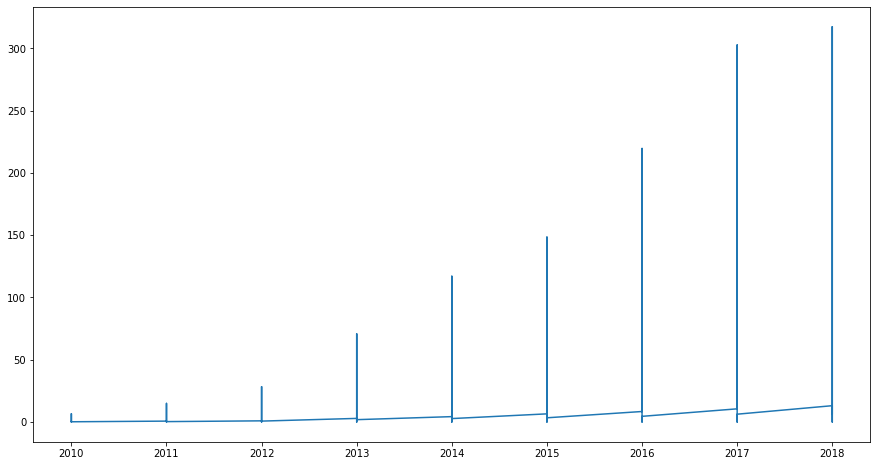

In [143]:
plt.plot(merged["year"],merged["demand"])